# Statistical evaluation of trained models

## 0 - Bibliothèques nécéssaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, norm
import seaborn as sns

## I - Introduction, variables, training and test sets

In [2]:
# Définition des premières variables

beta1 = 2
beta2_values = np.linspace(0, 0.16, 9)
M = [150,200,500,1000,2000]
n = 150
m = 2000
seed = 42

In [3]:
# Définition des ensembles d'entrainement, de test, coefficients des modèles 

np.random.seed(42)
epsilon = np.random.normal(0, 1, n + m) 
x = np.random.uniform(0, 5, n + m)

x_train = x[:n]
x_test = x[n:n+m]

epsilon_train = epsilon[:n]
epsilon_test = epsilon[n:n+m]

modele_A = []
modele_B = []


for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2

          coef_a = model_a.coef_[0]
          intercept_a = model_a.intercept_     
        
          # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          coef_b = model_b.coef_
          intercept_b = model_b.intercept_

          y = beta1*x + beta2*x**2 +epsilon 
          eq_a = intercept_a + coef_a * x
          modele_A.append([intercept_a, coef_a])
          eq_a_train = intercept_a + coef_a * x_train
          eq_a_test = intercept_a + coef_a * x_test
          eq_b = intercept_b + coef_b[0] * x + coef_b[1] * x**2
          modele_B.append([intercept_b, coef_b])
          eq_b_train = intercept_b + coef_b[0] * x_train + coef_b[1] * x_train**2
          eq_b_test = intercept_b + coef_b[0] * x_test + coef_b[1] * x_test**2



In [4]:
# Vérifier que la distribution de nos variables aléatoires est bien cohérente

def print_random_variables():
    
    np.random.seed(seed)
    
    x = np.random.uniform(0, 5, n + m)
    x_train = x[:n]
    x_test = x[n:n+m]
    
    epsilon = np.random.normal(0, 1, n + m)
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    x_vals = np.linspace(0, 5, 100)
    epsilon_vals = np.linspace(-4, 4, 100)

    plt.figure()
    plt.title("Distribution de X")
    plt.hist(x_train, bins=30, label="X Training set n_train = 150", color="blue", edgecolor='black', alpha=0.7, density=True)
    plt.hist(x_test, bins=30, label="X Test set n_test = 2000", color="red", edgecolor='black', alpha=0.7, density=True)
    plt.plot(x_vals, uniform.pdf(x_vals, 0, 5), 'k-', label="Uniform(0, 5)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure()
    plt.title("Distribution de epsilon")
    plt.hist(epsilon_train, bins=30, label="Eps Training set n_train = 150", color="green", edgecolor='black', alpha=0.7, density=True)
    plt.hist(epsilon_test, bins=30, label="Eps Test set m_train = 2000", color="orange", edgecolor='black', alpha=0.7, density=True)
    plt.plot(epsilon_vals, norm.pdf(epsilon_vals, 0, 1), 'k-', label="Normal(0, 1)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.show()


In [5]:
# Vérifier les fits de nos modèles 

def print_training_test_sets(): 
    

      np.random.seed(42)
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2

          coef_a = model_a.coef_[0]
          intercept_a = model_a.intercept_     
        
          # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          coef_b = model_b.coef_
          intercept_b = model_b.intercept_

          y = beta1*x + beta2*x**2 +epsilon 
          eq_a = intercept_a + coef_a * x
          eq_a_train = intercept_a + coef_a * x_train
          eq_a_test = intercept_a + coef_a * x_test
          eq_b = intercept_b + coef_b[0] * x + coef_b[1] * x**2
          eq_b_train = intercept_b + coef_b[0] * x_train + coef_b[1] * x_train**2
          eq_b_test = intercept_b + coef_b[0] * x_test + coef_b[1] * x_test**2

          plt.figure() # Fits des modèles 
          plt.title("Fits d'entrainement des modèles pour " f"beta2 = {beta2}" " et pour "f"n_train= {n}" )  
          plt.scatter(x_train[np.argsort(x_train)], y_train[np.argsort(x_train)], label = "Y réel", color = "green")
          plt.plot(x_train[np.argsort(x_train)], eq_a_train[np.argsort(x_train)], label = "Prédiction linéaire", color = "Red")
          plt.plot(x_train[np.argsort(x_train)], eq_b_train[np.argsort(x_train)], label = "Prédiction quadratique", color = "Orange")
          plt.xlabel("X")
          plt.ylabel("Y")
          plt.grid()
          plt.legend()  
          plt.show()     


          plt.figure() # Fits des modèles 
          plt.title("Fits de test des modèles pour " f"beta2 = {beta2}" " et pour "f"n_test = {m}" )  
          plt.scatter(x_test[np.argsort(x_test)], y_test[np.argsort(x_test)], label = "Y réel", color = "green")
          plt.plot(x_test[np.argsort(x_test)], eq_a_test[np.argsort(x_test)], label = "Prédiction linéaire", color = "Red")
          plt.plot(x_test[np.argsort(x_test)], eq_b_test[np.argsort(x_test)], label = "Prédiction quadratique", color = "Orange")
          plt.xlabel("X")
          plt.ylabel("Y")
          plt.grid()
          plt.legend()  
          plt.show()  

          plt.figure() # Fits des modèles 
          plt.title("Fits des modèles pour " f"beta2 = {beta2}" " et pour "f"n_test = {m}" )  
          plt.scatter(x[np.argsort(x)], y[np.argsort(x)], label = "Y réel", color = "green")
          plt.plot(x[np.argsort(x)], eq_a[np.argsort(x)], label = "Prédiction linéaire", color = "Red")
          plt.plot(x[np.argsort(x)], eq_b[np.argsort(x)], label = "Prédiction quadratique", color = "Orange")
          plt.xlabel("X")
          plt.ylabel("Y")
          plt.grid()
          plt.legend()  
          plt.show()  

## II - Erreurs de prédiction de chacun des modèles

In [6]:
# Performance des deux modèles conditionnellement à X

def performances_metrics_cond_X():

    for m in M:

        x = np.random.uniform(0, 5, n + m)
        x_train = x[:n]

        epsilon = np.random.normal(0, 1, n + m)
        epsilon_train = epsilon[:n]
        x_test = x[n:n + m]
        epsilon_test = epsilon[n:n + m]

        for beta2 in beta2_values:
            

            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
            y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

            # Linear Model : A
            model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
            y_pred_a = model_a.predict(x_test.reshape(-1, 1))
            pa = (y_test - y_pred_a)**2

            # Quadratic Model : B
            x_train_quad = np.column_stack((x_train, x_train**2))
            x_test_quad = np.column_stack((x_test, x_test**2))

            model_b = LinearRegression().fit(x_train_quad, y_train)
            y_pred_b = model_b.predict(x_test_quad)
            pb = (y_test - y_pred_b)**2

            differences = pa - pb

            # Représentation graphique de pa - pb, la différence de performance entre deux modèles 
            plt.figure(figsize=(10, 6))
            plt.title(f"pa - pb  pour beta2 = {beta2} et pour n_test= {m}")

            sns.scatterplot(x=x_test, y=differences, color="red", s=6, label=f"Differences pour beta2 = {beta2} et pour n_test = {m}")
            plt.axhline(y=0, color='black', linestyle='--', label='y = 0')

            box = plt.boxplot(differences, positions=[max(x_test) + 1], widths=0.5, patch_artist=True,
                              boxprops=dict(facecolor='blue', color='blue', alpha=0.5),
                              medianprops=dict(color='yellow'),
                              whiskerprops=dict(color='blue'),
                              capprops=dict(color='blue'),
                              flierprops=dict(color='blue', markeredgecolor='blue'))

            whisker_min = box['whiskers'][0].get_ydata()[1]
            whisker_max = box['whiskers'][1].get_ydata()[1]
            q1 = box['boxes'][0].get_path().vertices[0, 1]
            median = box['medians'][0].get_ydata()[0]
            q3 = box['boxes'][0].get_path().vertices[2, 1]

            plt.text(max(x_test) + 1, whisker_min, f'Whisker Min: {whisker_min:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, whisker_max, f'Whisker Max: {whisker_max:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, median, f'Median: {median:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='black')

            plt.xlabel("X test set")
            plt.ylabel("Differences")
            plt.grid()
            plt.legend()
            plt.show()

            # Représentation de pa, l'erreur du modèle linéaire

            plt.figure(figsize=(10, 6))
            plt.title(f"pa = (y-ya)**2  pour beta2 = {beta2} et pour n_test= {m}")

            sns.scatterplot(x=x_test, y=pa, color="red", s=6, label=f"Differences pour beta2 = {beta2} et pour n_test = {m}")

            box = plt.boxplot(pb, positions=[max(x_test) + 1], widths=0.5, patch_artist=True,
                              boxprops=dict(facecolor='blue', color='blue', alpha=0.5),
                              medianprops=dict(color='yellow'),
                              whiskerprops=dict(color='blue'),
                              capprops=dict(color='blue'),
                              flierprops=dict(color='blue', markeredgecolor='blue'))

            whisker_min = box['whiskers'][0].get_ydata()[1]
            whisker_max = box['whiskers'][1].get_ydata()[1]
            q1 = box['boxes'][0].get_path().vertices[0, 1]
            median = box['medians'][0].get_ydata()[0]
            q3 = box['boxes'][0].get_path().vertices[2, 1]

            plt.text(max(x_test) + 1, whisker_min, f'Whisker Min: {whisker_min:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, whisker_max, f'Whisker Max: {whisker_max:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, median, f'Median: {median:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='black')

            plt.xlabel("X test set")
            plt.ylabel("pa = (y-ya)**2")
            plt.grid()
            plt.legend()
            plt.show()

            # Représentation de pb, l'erreur du modèle quadratique

            plt.figure(figsize=(10, 6))
            plt.title(f"pb = (y-yb)**2  pour beta2 = {beta2} et pour n_test= {m}")

            sns.scatterplot(x=x_test, y=pb, color="red", s=6, label=f"Differences pour beta2 = {beta2} et pour n_test = {m}")

            box = plt.boxplot(pb, positions=[max(x_test) + 1], widths=0.5, patch_artist=True,
                              boxprops=dict(facecolor='blue', color='blue', alpha=0.5),
                              medianprops=dict(color='yellow'),
                              whiskerprops=dict(color='blue'),
                              capprops=dict(color='blue'),
                              flierprops=dict(color='blue', markeredgecolor='blue'))

            whisker_min = box['whiskers'][0].get_ydata()[1]
            whisker_max = box['whiskers'][1].get_ydata()[1]
            q1 = box['boxes'][0].get_path().vertices[0, 1]
            median = box['medians'][0].get_ydata()[0]
            q3 = box['boxes'][0].get_path().vertices[2, 1]

            plt.text(max(x_test) + 1, whisker_min, f'Whisker Min: {whisker_min:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, whisker_max, f'Whisker Max: {whisker_max:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, median, f'Median: {median:.2f}', horizontalalignment='center', color='black')
            plt.text(max(x_test) + 1, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='black')

            plt.xlabel("X test set")
            plt.ylabel("pb = (y-yb)**2")
            plt.grid()
            plt.legend()
            plt.show()



In [7]:
# Répartition de la performance du modèle 

def performance_metrics_hist():
    
    for m in M:

      np.random.seed(42)
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in beta2_values:
            
          
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2     
        
          # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          differences = pa - pb

          plt.figure() # Erreur individuelle des modèles
          plt.title("prédiction du modèle linéaire pour " f"beta2 = {beta2}" " et pour "f"n_test = {m}" ) 
          plt.hist(pa, bins=30, label=f"pa = (y - ya)^2 pour beta2 = {beta2} et pour n_test = {m}", color="red", edgecolor='black', alpha=0.7)
          plt.xlabel(" Erreur associée ")
          plt.ylabel("Nombre d'occurences")      
          plt.grid()
          plt.legend()
          plt.show()

          plt.figure()
          plt.title("prédiction du modèle quadratique pour " f"beta2 = {beta2}" " et pour "f"n_test = {m}" )       
          plt.hist(pb, bins=30, label=f"pb = (y - yb)^2 pour beta2 = {beta2} et pour n_test = {m}", color="orange", edgecolor='black', alpha=0.7)
          plt.xlabel(" Erreur associée ")
          plt.ylabel("Nombre d'occurences")      
          plt.grid()
          plt.legend()
          plt.show()

          plt.figure()
          plt.title("Différence de prédiction des modèles " f"beta2 = {beta2}" " et pour "f"n_test = {m}" )        
          plt.hist(differences, bins=30, label=f"pa - pb pour beta2 = {beta2} et pour n_test = {m}", color="blue", edgecolor='black', alpha=0.7)
          plt.xlabel(" Erreur associée ")
          plt.ylabel("Nombre d'occurences")      
          plt.grid()
          plt.legend()
          plt.show()

In [8]:
# MSE

def MSE():
    
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    mse_A = []
    mse_B = []
    
    for beta2 in beta2_values:
            
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

         # Linear Model : A
        model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a = model_a.predict(x_test.reshape(-1, 1))

        mse_A.append(mean_squared_error(y_pred_a, y_test))
    
          # Quadratic Model : B
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))
            
        model_b = LinearRegression().fit(x_train_quad, y_train)
        y_pred_b = model_b.predict(x_test_quad)
        mse_B.append(mean_squared_error(y_pred_b, y_test))

    plt.figure()
    plt.title("Différence des MSE")
    plt.plot(beta2_values, mse_A, label = "MSE_A")
    plt.plot(beta2_values, mse_B, label = "MSE_B")
       
    plt.grid()
    plt.legend()
    plt.show()

## III - Statistiques descriptives sur l'erreur de prédiction de chacun des modèles

In [9]:
# Création d'un tableau regroupant différents indicateurs 

def descriptive_statistics():
    
    empirical_means_A = []
    standard_deviations_A = []
    medians_A = []
    Q1_A = []
    Q3_A = []
    IQR_A = []

    empirical_means_B = []
    standard_deviations_B = []
    medians_B = []
    Q1_B = []
    Q3_B = []
    IQR_B = []

    for m in M:

      a = []
      b = []
      c = []
      d = []
      q = []
      iqr = []

      e = []
      f = []
      g = []
      h = []
      q_ = []
      iqr_ = []

      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          mean_a = sum(pa)/m
          mean_b = sum(pb)/m

          a.append(mean_a)
          e.append(mean_b)

          std_a = np.std(pa, ddof=1)
          std_b = np.std(pb, ddof = 1)

          b.append(std_a)
          f.append(std_b)

          q1_a = np.percentile(pa, 25)
          med_a = np.percentile(pa, 50)        
          q3_a = np.percentile(pa, 75)

          q1_b = np.percentile(pb, 25)
          med_b = np.percentile(pb, 50)        
          q3_b = np.percentile(pb, 75)

          c.append(med_a)
          g.append(med_b)
          d.append(q1_a)
          q.append(q3_a)
          h.append(q1_b)
          q_.append(q3_b)

          iqr.append(q3_a - q1_a)
          iqr_.append(q3_b - q1_b)

      empirical_means_A.append(a)
      empirical_means_B.append(e)
      standard_deviations_A.append(b)
      standard_deviations_B.append(f)
      medians_A.append(c)
      medians_B.append(g)
      Q1_A.append(d)
      Q1_B.append(h)
      Q3_A.append(q)
      Q3_B.append(q_)
      IQR_A.append(iqr)
      IQR_B.append(iqr_)

    return empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B

def create_data():
    
    empirical_means_A, standard_deviations_A, medians_A, Q1_A, Q3_A, IQR_A, empirical_means_B, standard_deviations_B, medians_B, Q1_B, Q3_B, IQR_B = descriptive_statistics()
    
    
    data_A_all = {
    "Empirical Mean": empirical_means_A,
    "Standard Deviation": standard_deviations_A,
    "Median": medians_A,
    "Q1": Q1_A,
    "Q3": Q3_A,
    "IQR": IQR_A
   }

    stats_A_all = pd.DataFrame(data_A_all, index=M)

    data_B_all = {
    "Empirical Mean": empirical_means_B,
    "Standard Deviation": standard_deviations_B,
    "Median": medians_B,
    "Q1": Q1_B,
    "Q3": Q3_B,
    "IQR": IQR_B
   }

    stats_B_all = pd.DataFrame(data_B_all, index=M)

    df_empirical_means_A = pd.DataFrame(empirical_means_A, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_A = pd.DataFrame(standard_deviations_A, index=M, columns=beta2_values).transpose()
    df_medians_A = pd.DataFrame(medians_A, index=M, columns=beta2_values).transpose()
    df_Q1_A = pd.DataFrame(Q1_A, index=M, columns=beta2_values).transpose()
    df_Q3_A = pd.DataFrame(Q3_A, index=M, columns=beta2_values).transpose()
    df_IQR_A = pd.DataFrame(IQR_A, index=M, columns=beta2_values).transpose()

    df_empirical_means_B = pd.DataFrame(empirical_means_B, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_B = pd.DataFrame(standard_deviations_B, index=M, columns=beta2_values).transpose()
    df_medians_B = pd.DataFrame(medians_B, index=M, columns=beta2_values).transpose()
    df_Q1_B = pd.DataFrame(Q1_B, index=M, columns=beta2_values).transpose()
    df_Q3_B = pd.DataFrame(Q3_B, index=M, columns=beta2_values).transpose()
    df_IQR_B = pd.DataFrame(IQR_B, index=M, columns=beta2_values).transpose()    

    return stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, \
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B


(stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()

In [10]:
# Comparaison de certaines variables selon beta2

def plot_variables_beta2():

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    axs[0, 0].plot(beta2_values, df_empirical_standard_deviations_A[2000], label="deviation standard A", color="black")
    axs[0, 0].plot(beta2_values, df_empirical_standard_deviations_B[2000], label="deviation standard B", color="yellow")
    axs[0, 0].set_title("Comparaison des valeurs de déviations standard selon beta2")
    axs[0, 0].grid()
    axs[0, 0].legend()

    axs[0, 1].plot(beta2_values, df_Q1_A[2000], label="Q1 error A")
    axs[0, 1].plot(beta2_values, df_Q1_B[2000], label="Q1 error B")
    axs[0, 1].plot(beta2_values, df_medians_A[2000], label="median error A")
    axs[0, 1].plot(beta2_values, df_medians_B[2000], label="median error B")
    axs[0, 1].plot(beta2_values, df_Q3_A[2000], label="Q3 error A")
    axs[0, 1].plot(beta2_values, df_Q3_B[2000], label="Q3 error B")
    axs[0, 1].set_title("Quartiles de l'erreur selon le modèle")
    axs[0, 1].grid()
    axs[0, 1].legend()

    axs[1, 0].plot(beta2_values, df_Q1_A[2000], label="Q1 error A")
    axs[1, 0].plot(beta2_values, df_Q1_B[2000], label="Q1 error B")
    axs[1, 0].set_title("Quartiles Q1 de l'erreur selon le modèle")
    axs[1, 0].grid()
    axs[1, 0].legend()

    axs[1, 1].plot(beta2_values, df_Q3_A[2000], label="Q3 error A", color="purple")
    axs[1, 1].plot(beta2_values, df_Q3_B[2000], label="Q3 error B", color="brown")
    axs[1, 1].set_title("Quartiles Q3 de l'erreur selon le modèle")
    axs[1, 1].grid()
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()


In [11]:
# Comparaison de certaines variables selon n_test

def plot_variables_ntest():
    
    beta2_1, beta2_2, beta2_3 = [0.0, 0.08, 0.16]
    
    df1_std = df_empirical_standard_deviations_A.loc[beta2_1]
    df2_std = df_empirical_standard_deviations_A.loc[beta2_2]
    df3_std = df_empirical_standard_deviations_A.loc[beta2_3]
    
    df1_med = df_medians_A.loc[beta2_1]
    df2_med = df_medians_A.loc[beta2_2]
    df3_med = df_medians_A.loc[beta2_3]
    
    df1_q1 = df_Q1_A.loc[beta2_1]
    df2_q1 = df_Q1_A.loc[beta2_2]
    df3_q1 = df_Q1_A.loc[beta2_3]
    
    df1_q3 = df_Q3_A.loc[beta2_1]
    df2_q3 = df_Q3_A.loc[beta2_2]
    df3_q3 = df_Q3_A.loc[beta2_3]
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Premier subplot : Comparaison des valeurs de deviations standard selon beta2
    axs[0, 0].plot(M, df1_std, label="deviation standard A, beta2 = 0", color="black")
    axs[0, 0].plot(M, df2_std, label="deviation standard A beta2 = 0.08", color="yellow")
    axs[0, 0].plot(M, df3_std, label="deviation standard A, beta2 = 0.16", color="red")
    axs[0, 0].set_title("Comparaison des valeurs de déviations standard selon n_test")
    axs[0, 0].grid()
    axs[0, 0].legend()

    # Deuxième subplot : Quartiles de l'erreur selon le modèle
    axs[0, 1].plot(M, df1_q1, label="Q1 error A, beta = 0")
    axs[0, 1].plot(M, df2_q1, label="Q1 error A, beta = 0.08")
    axs[0, 1].plot(M, df3_q1, label="Q1 error A, beta = 0.16")
    axs[0, 1].plot(M, df1_med, label="median error A, beta = 0")
    axs[0, 1].plot(M, df2_med, label="median error A, beta = 0.08")
    axs[0, 1].plot(M, df3_med, label="median error A, beta = 0.16")
    axs[0, 1].plot(M, df1_q3, label="Q3 error A, beta = 0")
    axs[0, 1].plot(M, df2_q3, label="Q3 error A, beta = 0.08")
    axs[0, 1].plot(M, df3_q3, label="Q3 error A, beta = 0.16")
    axs[0, 1].set_title("Quartiles de l'erreur selon le modèle")
    axs[0, 1].grid()
    axs[0, 1].legend()

    axs[1, 0].plot(M, df1_q1, label="Q1 error A, beta = 0")
    axs[1, 0].plot(M, df2_q1, label="Q1 error A, beta = 0.08")
    axs[1, 0].plot(M, df3_q1, label="Q1 error A, beta = 0.16")
    axs[1, 0].set_title("Quartiles Q1 de l'erreur selon beta2")
    axs[1, 0].grid()
    axs[1, 0].legend()

    axs[1, 1].plot(M, df1_q3, label="Q3 error A, beta = 0")
    axs[1, 1].plot(M, df2_q3, label="Q3 error A, beta = 0.08")
    axs[1, 1].plot(M, df3_q3, label="Q3 error A, beta = 0.16")
    axs[1, 1].set_title("Quartiles Q3 de l'erreur selon le modèle")
    axs[1, 1].grid()
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

    df1_std = df_empirical_standard_deviations_B.loc[beta2_1]
    df2_std = df_empirical_standard_deviations_B.loc[beta2_2]
    df3_std = df_empirical_standard_deviations_B.loc[beta2_3]
    
    df1_med = df_medians_B.loc[beta2_1]
    df2_med = df_medians_B.loc[beta2_2]
    df3_med = df_medians_B.loc[beta2_3]
    
    df1_q1 = df_Q1_B.loc[beta2_1]
    df2_q1 = df_Q1_B.loc[beta2_2]
    df3_q1 = df_Q1_B.loc[beta2_3]
    
    df1_q3 = df_Q3_B.loc[beta2_1]
    df2_q3 = df_Q3_B.loc[beta2_2]
    df3_q3 = df_Q3_B.loc[beta2_3]
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Premier subplot : Comparaison des valeurs de deviations standard selon beta2
    axs[0, 0].plot(M, df1_std, label="std error B, beta2 = 0", color="black")
    axs[0, 0].plot(M, df2_std, label="std error B beta2 = 0.08", color="yellow")
    axs[0, 0].plot(M, df3_std, label="std error B, beta2 = 0.16", color="red")
    axs[0, 0].set_title("Comparaison des valeurs de déviations standard selon n_test")
    axs[0, 0].grid()
    axs[0, 0].legend()

    # Deuxième subplot : Quartiles de l'erreur selon le modèle
    axs[0, 1].plot(M, df1_q1, label="Q1 error B, beta = 0")
    axs[0, 1].plot(M, df2_q1, label="Q1 error B, beta = 0.08")
    axs[0, 1].plot(M, df3_q1, label="Q1 error B, beta = 1")
    axs[0, 1].plot(M, df1_med, label="median error B, beta = 0")
    axs[0, 1].plot(M, df2_med, label="median error B, beta = 0.08")
    axs[0, 1].plot(M, df3_med, label="median error B, beta = 1")
    axs[0, 1].plot(M, df1_q3, label="Q3 error B, beta = 0")
    axs[0, 1].plot(M, df2_q3, label="Q3 error B, beta = 0.08")
    axs[0, 1].plot(M, df3_q3, label="Q3 error B, beta = 1")
    axs[0, 1].set_title("Quartiles de l'erreur selon le modèle")
    axs[0, 1].grid()
    axs[0, 1].legend()

    # Troisième subplot : Quartiles Q1 de l'erreur selon le modèle
    axs[1, 0].plot(M, df1_q1, label="Q1 error B, beta = 0")
    axs[1, 0].plot(M, df2_q1, label="Q1 error B, beta = 0.08")
    axs[1, 0].plot(M, df3_q1, label="Q1 error B, beta = 1")
    axs[1, 0].set_title("Quartiles Q1 de l'erreur selon beta2")
    axs[1, 0].grid()
    axs[1, 0].legend()

    # Quatrième subplot : Quartiles Q3 de l'erreur selon le modèle
    axs[1, 1].plot(M, df1_q3, label="Q3 error B, beta = 0")
    axs[1, 1].plot(M, df2_q3, label="Q3 error B, beta = 0.08")
    axs[1, 1].plot(M, df3_q3, label="Q3 error B, beta = 1")
    axs[1, 1].set_title("Quartiles Q3 de l'erreur selon le modèle")
    axs[1, 1].grid()
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

## IV - Inferential statistics

We already have the standard error of the mean (according to m and beta2), that gives us a first information of the precisation of mA

Derive formulas (or algorithms) for the standard error (SE) of the mean

Methods: 
- parametric estimates (consider different cases when n is small versus large and when VA is assumed to be Gaussian or not)
- bootstrap estimates

### IV.1 - Parametric estimates

### IV..A - When n_test is large

In [12]:
# Estimation paramétrique de l'erreur standard

def divide_by_sqrt(df):
    return df.apply(lambda x: x / np.sqrt(x.name), axis=0)

def standard_error_test_large():

    (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
    stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()

    df_standard_error_A = divide_by_sqrt(df_empirical_standard_deviations_A)
    df_standard_error_B = divide_by_sqrt(df_empirical_standard_deviations_B)

    return df_standard_error_A, df_standard_error_B


df_standard_error_A, df_standard_error_B = standard_error_test_large()

### IV.1.B - When n_test is small

### IV.1.C - When n_test is small and not gaussian

### IV.2 -  Non parametric estimates / Bootstrap estimates

### IV.2.A - Bootstrap on test sample

In [13]:
# Détermination de l'erreur standard par bootstrapping

def standard_error_bootstrap_test():
   
   B = 250

   se_bootstrap_A = []
   se_bootstrap_B = []

   for m in M:
   
      liste_A = []
      liste_B = []
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      epsilon_train = epsilon[:n]
      x_train_quad = np.column_stack((x_train, x_train**2))
      bootstrap_indices = np.random.choice(m, size=(B, m), replace=True)
    
      for beta2 in beta2_values:
                
            liste_boot_A = []
            liste_boot_B = []
            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          
            for bootstrap_index in bootstrap_indices:
         
               x_test = x[bootstrap_index]
               y_test = beta1 * x_test + beta2 * x_test**2 + epsilon[bootstrap_index]
            
               model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
               y_pred_a = model_a.predict(x_test.reshape(-1, 1))
               pa = (y_test - y_pred_a)**2
    
               
               x_test_quad = np.column_stack((x_test, x_test**2))
               model_b = LinearRegression().fit(x_train_quad, y_train)
               y_pred_b = model_b.predict(x_test_quad)
               pb = (y_test - y_pred_b)**2

               sea = np.std(pa, ddof=1) / (m**0.5)
               seb = np.std(pb, ddof = 1) / (m**0.5)

               liste_boot_A.append(sea)
               liste_boot_B.append(seb)

            liste_A.append(np.mean(liste_boot_A))
            liste_B.append(np.mean(liste_boot_B))
    
      se_bootstrap_A.append(liste_A)
      se_bootstrap_B.append(liste_B)

   df_se_bootstrap_A = pd.DataFrame(se_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_se_bootstrap_B = pd.DataFrame(se_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_se_bootstrap_A, df_se_bootstrap_B

### IV.2.B - Subsets of training sets (varying k)

In [14]:
# We pick subsets 
# instead of growing the test size, we first generate the maximum test size and we use subsets of size k < m for testing

def standard_error_varying_test_derived():

    standard_errors_A = []
    standard_errors_B = []

    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    for k in M:

      x_train = x[:n]
      x_test = x[n:n+k]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+k]

      liste_A = []
      liste_B = []
    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          se_a = np.std(pa, ddof=1)/(k**0.5)
          se_b = np.std(pb, ddof = 1)/(k**0.5)

          liste_A.append(se_a)
          liste_B.append(se_b)

      standard_errors_A.append(liste_A)
      standard_errors_B.append(liste_B)

    df_se_varying_k_A = pd.DataFrame(standard_errors_A, index=M, columns=beta2_values).transpose()
    df_se_varying_k_B = pd.DataFrame(standard_errors_B, index=M, columns=beta2_values).transpose()

    return df_se_varying_k_A, df_se_varying_k_B

### IV.2.C - Varying k & Bootstrap

In [15]:
# We use this new method and we bootstrap

def standard_error_varying_bootstrapped_test():
   
   B = 250

   se_bootstrap_A = []
   se_bootstrap_B = []

   for k in M:
   
      liste_A = []
      liste_B = []
      beta1 = 2
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+k]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+k]

      x_train_quad = np.column_stack((x_train, x_train**2))

      bootstrap_indices = np.random.choice(k, size=(B, k), replace=True)
    
      for beta2 in beta2_values:
                
            liste_boot_A = []
            liste_boot_B = []
            y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          
            for bootstrap_index in bootstrap_indices:
                        
               x_test = x[bootstrap_index]
               y_test = beta1 * x_test + beta2 * x_test**2 + epsilon[bootstrap_index]
            
               model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
               y_pred_a = model_a.predict(x_test.reshape(-1, 1))
               pa = (y_test - y_pred_a)**2
    
               
               x_test_quad = np.column_stack((x_test, x_test**2))
               model_b = LinearRegression().fit(x_train_quad, y_train)
               y_pred_b = model_b.predict(x_test_quad)
               pb = (y_test - y_pred_b)**2

               sea = np.std(pa, ddof=1) / (k**0.5)
               seb = np.std(pb, ddof = 1) / (k**0.5)

               liste_boot_A.append(sea)
               liste_boot_B.append(seb)

            liste_A.append(np.mean(liste_boot_A))
            liste_B.append(np.mean(liste_boot_B))
    
      se_bootstrap_A.append(liste_A)
      se_bootstrap_B.append(liste_B)

   df_se_bootstrap_A = pd.DataFrame(se_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_se_bootstrap_B = pd.DataFrame(se_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_se_bootstrap_A, df_se_bootstrap_B

### IV.3 - Comparison between various methods

### IV.3.A - Comparison between parametric method and bootstrap estimate

In [16]:
# Selection des valeurs de beta2

beta2_1 = 0.0
beta2_2 = 0.08
beta2_3 = 0.16
    

In [17]:
# Standard error obtained by parametric method against bootstrapped
def plot_standard_error_comparison():

    df_standard_error_A, df_standard_error_B = standard_error_test_large()
    df_se_bootstrap_A_test, df_se_bootstrap_B_test = standard_error_bootstrap_test() 

    
    fig2, ax2 = plt.subplots(figsize=(8, 4))
    ax2.plot(beta2_values, df_standard_error_A[2000], label="Méthode paramétrique A", color="blue")
    ax2.plot(beta2_values, df_se_bootstrap_A_test[2000], label="Méthode bootstrap A sur ensemble de test", color="red")
    ax2.plot(beta2_values, df_standard_error_B[2000], label="Méthode paramétrique B", color="darkblue")
    ax2.plot(beta2_values, df_se_bootstrap_B_test[2000], label="Méthode bootstrap B sur ensemble de test", color="darkred")
    ax2.set_xlabel("beta2")
    ax2.set_ylabel("standard error")
    ax2.set_title("Erreur standard pour A et B")
    ax2.grid()
    ax2.legend()
    plt.tight_layout()
    plt.show()

    # Plot standard error for specific beta2 values
    df1 = df_standard_error_A.loc[beta2_1]
    df2 = df_standard_error_A.loc[beta2_2]
    df3 = df_standard_error_A.loc[beta2_3]
    df4 = df_se_bootstrap_A_test.loc[beta2_1]
    df5 = df_se_bootstrap_A_test.loc[beta2_2]
    df6 = df_se_bootstrap_A_test.loc[beta2_3]

    plt.figure(figsize=(10, 6))
    plt.plot(df1.index, df1.values, marker='o', label = "erreur standard parametrique selon n_test pour beta2 = "  f'{beta2_1}', color = "lightblue")
    plt.plot(df4.index, df4.values, marker='o', label = "erreur standard bootstrap selon n_test pour beta2 = " f'{beta2_1}', color = "darkblue")
    plt.plot(df2.index, df2.values, marker='o', label = "erreur standard parametrique selon n_test pour beta2 = " f'{beta2_2}', color = "red")
    plt.plot(df5.index, df5.values, marker='o', label = "erreur standard bootstrap selon n_test pour beta2 = " f'{beta2_2}', color = "darkred")
    plt.plot(df3.index, df3.values, marker='o', label = "erreur standard parametrique selon n_test pour beta2 = " f'{beta2_3}', color = "lightgreen")
    plt.plot(df6.index, df6.values, marker='o', label = "erreur standard bootstrap selon n_test pour beta2 = " f'{beta2_3}', color = "darkgreen")
    plt.xlabel("n_test")
    plt.title(f'erreur standard du modèle linéaire pour beta2 = {beta2_1}, {beta2_2}, {beta2_3}')
    plt.ylabel('Erreur standard')
    plt.legend()
    plt.grid(True)
    plt.show()


### IV.3.B - For varying k, comparison between bootstrapped method and parametric method

In [18]:
# Standard error obtained by parametric method against bootstrapped, varying method

def plot_standard_error_comparison_varying():

    
    df_se_varying_k_A, df_se_varying_k_B = standard_error_varying_test_derived()
    df_se_varying_bootstrap_A_test, df_se_varying_bootstrap_B_test = standard_error_varying_bootstrapped_test()

    df1 = df_se_varying_bootstrap_A_test.loc[beta2_1]
    df2 = df_se_varying_bootstrap_A_test.loc[beta2_2]
    df3 = df_se_varying_bootstrap_A_test.loc[beta2_3]
    df4 = df_se_varying_k_A.loc[beta2_1]
    df5 = df_se_varying_k_A.loc[beta2_2]
    df6 = df_se_varying_k_A.loc[beta2_3]

    plt.figure(figsize=(10, 6))
    plt.plot(df1.index, df1.values, marker='o', label=f"Bootstrap pour beta2 = {beta2_1}", color="darkblue")
    plt.plot(df1.index, df4.values, marker='o', label=f"Derived pour beta2 = {beta2_1}", color="lightblue")
    plt.plot(df2.index, df2.values, marker='o', label=f"Bootstrap pour beta2 = {beta2_2}", color="darkred")
    plt.plot(df2.index, df5.values, marker='o', label=f"Derived pour beta2 = {beta2_2}", color="#FF6666")
    plt.plot(df3.index, df3.values, marker='o', label=f"Bootstrap pour beta2 = {beta2_3}", color="darkgreen")
    plt.plot(df3.index, df6.values, marker='o', label=f"Derived pour beta2 = {beta2_3}", color="lightgreen")
    plt.title('Evolution de l\'erreur standard du modèle varying k bootstrapped')
    plt.xlabel('k')
    plt.ylabel('Erreur standard')
    plt.legend()
    plt.grid(True)
    plt.show()



### IV.3.C - Comparison between varying test samples (k < m) and varying test size (k =m)

In [19]:
# Comparison of both methods 

def plot_standard_error_both_methods(): 


    df_standard_error_A, df_standard_error_B = standard_error_test_large()
    df_se_bootstrap_A_test, df_se_bootstrap_B_test = standard_error_bootstrap_test() 
    df_se_varying_k_A, df_se_varying_k_B = standard_error_varying_test_derived()
    df_se_varying_bootstrap_A_test, df_se_varying_bootstrap_B_test = standard_error_varying_bootstrapped_test()

    # Evolution for a given n_test value, changing beta2
    plt.figure()
    plt.title("Varying method vs reducing test size, bootstrap, n_test fixed")
    plt.plot(beta2_values, df_se_bootstrap_A_test[1000], label="m = 250, smaller size test sample")
    plt.plot(beta2_values, df_se_varying_bootstrap_A_test[1000], label="m = 2000, k = 250, k < m method")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure()
    plt.title("Varying method vs reducing test size, bootstrap, n_test fixed, modèle B")
    plt.plot(beta2_values, df_se_bootstrap_B_test[1000], label="m = 250, smaller size test sample")
    plt.plot(beta2_values, df_se_varying_bootstrap_B_test[1000], label="m = 2000, k = 250, k < m method")
    plt.grid()
    plt.legend()
    plt.show()

    # Comparison for given values of beta2, changing n_test
    df4 = df_se_varying_k_A.loc[beta2_1]
    df5 = df_se_varying_k_A.loc[beta2_2]
    df6 = df_se_varying_k_A.loc[beta2_3]
    dff1 = df_standard_error_A.loc[beta2_1]
    dff2 = df_standard_error_A.loc[beta2_2]
    dff3 = df_standard_error_A.loc[beta2_3]

    plt.figure()
    plt.title("Comparison of varying method vs reducing test size, derived")
    plt.plot(df4.index, df4.values, marker='o', label=f"Varying method k < m pour beta2 = {beta2_1}", color="darkblue")
    plt.plot(dff1.index, dff1.values, marker='o', label=f"m = k pour beta2 = {beta2_1}", color="lightblue")
    plt.plot(df5.index, df5.values, marker='o', label=f"Varying method k < m pour beta2 = {beta2_2}", color="darkred")
    plt.plot(dff2.index, dff2.values, marker='o', label=f"m = k pour beta2 = {beta2_2}", color="red")
    plt.plot(df6.index, df6.values, marker='o', label=f"Varying method k < m pour beta2 = {beta2_3}", color="darkgreen")
    plt.plot(dff3.index, dff3.values, marker='o', label=f"m = k pour beta2 = {beta2_3}", color="lightgreen")
    plt.grid()
    plt.legend()
    plt.show()


    df1 = df_se_varying_bootstrap_A_test.loc[beta2_1]
    dff1 = df_se_bootstrap_A_test.loc[beta2_1]
    df2 = df_se_varying_bootstrap_A_test.loc[beta2_2]
    dff2 = df_se_bootstrap_A_test.loc[beta2_2]
    df3 = df_se_varying_bootstrap_A_test.loc[beta2_3]
    dff3 = df_se_bootstrap_A_test.loc[beta2_3]

    plt.figure()
    plt.title("Comparison of standard errors bootstrap test")
    plt.plot(df1.index, df1.values, marker='o', label=f"Varying method k < m pour beta2 = {beta2_1}", color="darkblue")
    plt.plot(dff1.index, dff1.values, marker='o', label=f"m = k pour beta2 = {beta2_1}", color="lightblue")
    plt.plot(df2.index, df2.values, marker='o', label=f"Varying method k < m pour beta2 = {beta2_2}", color="darkred")
    plt.plot(dff2.index, dff2.values, marker='o', label=f"m = k pour beta2 = {beta2_2}", color="red")
    plt.plot(df3.index, df3.values, marker='o', label=f"Varying method k < m pour beta2 = {beta2_3}", color="darkgreen")
    plt.plot(dff3.index, dff3.values, marker='o', label=f"m = k pour beta2 = {beta2_3}", color="lightgreen")
    plt.grid()
    plt.legend()
    plt.show()

### V - Confidence interval of the mean

### V.1 - Parametric method

In [20]:
# Creation d'un intervalle de confiance à partir de la formule dérivée de ses bornes 
# bornes = moyenne empirique +/- student*erreur standard

def create_interval(lower, upper):
      return pd.Interval(left=lower, right=upper, closed='both')


def confidence_interval_mean():
     
     
   (stats_A_all, df_empirical_means_A, df_empirical_standard_deviations_A, df_medians_A, df_Q1_A, df_Q3_A, df_IQR_A, 
     stats_B_all, df_empirical_means_B, df_empirical_standard_deviations_B, df_medians_B, df_Q1_B, df_Q3_B, df_IQR_B) = create_data()
    
   df_standard_error_A, df_standard_error_B = standard_error_test_large()

   t_critical = 1.96
   CI_lower_A = df_empirical_means_A - t_critical * df_standard_error_A
   CI_lower_B = df_empirical_means_B - t_critical * df_standard_error_B
   CI_upper_A = df_empirical_means_A + t_critical * df_standard_error_A
   CI_upper_B = df_empirical_means_B + t_critical * df_standard_error_B
     
   confidence_intervals_A = pd.DataFrame(index=CI_lower_A.index, columns=CI_lower_A.columns)
   confidence_intervals_B = pd.DataFrame(index=CI_lower_B.index, columns=CI_lower_B.columns)

   for col in CI_lower_A.columns:
    confidence_intervals_A[col] = CI_lower_A[col].combine(CI_upper_A[col], create_interval)

   for col in CI_lower_B.columns:
    confidence_intervals_B[col] = CI_lower_B[col].combine(CI_upper_B[col], create_interval)

   return confidence_intervals_A, confidence_intervals_B

### V.2 - Bootstrap

In [21]:
# Bootstrap pour trouver une loi de la moyenne, et sortir ses quartiles 

def conf_each_bootstrap(n, B, m):

    np.random.seed(42)

    ci_bootstrap_A = []
    ci_bootstrap_B = []

    beta1 = 2
    B = 250
    alpha = 0.05
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    bootstrap_indices = np.random.choice(m, size=(B, m), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        moy_boot_A = []
        moy_boot_B = []
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train

        for bootstrap_index in bootstrap_indices:
       
           x_test = x[bootstrap_index]
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2
    
           moy_boot_A.append(np.mean(pa))
           moy_boot_B.append(np.mean(pb))

        lower_A = np.percentile(moy_boot_A, 100 * (alpha / 2))
        upper_A = np.percentile(moy_boot_A, 100 * (1 - alpha / 2))
        lower_B = np.percentile(moy_boot_B, 100 * (alpha / 2))
        upper_B = np.percentile(moy_boot_B, 100 * (1 - alpha / 2))

        ci_bootstrap_A.append(pd.Interval(left=lower_A, right=upper_A, closed='both'))
        ci_bootstrap_B.append(pd.Interval(left=lower_B, right=upper_B, closed='both'))
    
    return ci_bootstrap_A, ci_bootstrap_B     

def confidence_interval_bootstrap():

   M = [150, 200, 500, 1000, 2000]

   liste_ci_bootstrap_A = []
   liste_ci_bootstrap_B = []

   for m in M:

      ci_bootstrap_A, ci_bootstrap_B = conf_each_bootstrap(150,250,m)

      liste_ci_bootstrap_A.append(ci_bootstrap_A)
      liste_ci_bootstrap_B.append(ci_bootstrap_B)

   df_ci_bootstrap_A = pd.DataFrame(liste_ci_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_ci_bootstrap_B = pd.DataFrame(liste_ci_bootstrap_B, index=M, columns=beta2_values).transpose()

   return df_ci_bootstrap_A, df_ci_bootstrap_B


In [22]:
# Création des invtervalles de confiance pour A et B

def convert_intervals_to_list(df):
    return [(interval.left, interval.right) for interval in df]


def graphs_confidence_intervals_A():

    confidence_intervals_A, confidence_intervals_B = confidence_interval_mean()
    df_ci_bootstrap_A, df_ci_bootstrap_B = confidence_interval_bootstrap()
    
    df1 = df_ci_bootstrap_A.loc[beta2_1]
    df2 = df_ci_bootstrap_A.loc[beta2_2]
    df3 = df_ci_bootstrap_A.loc[beta2_3]
    df4 = confidence_intervals_A.loc[beta2_1]
    df5 = confidence_intervals_A.loc[beta2_2]
    df6 = confidence_intervals_A.loc[beta2_3]

    y_values = convert_intervals_to_list(df1)
    table_1 = convert_intervals_to_list(df2)
    table_2 = convert_intervals_to_list(df3)
    table_3 = convert_intervals_to_list(df4)
    table_4 = convert_intervals_to_list(df5)
    table_5 = convert_intervals_to_list(df6)

    x = [150, 200, 500, 1000, 2000]
    y1, y2 = zip(*y_values)
    y3, y4 = zip(*table_1)
    y5, y6 = zip(*table_2)
    y7, y8 = zip(*table_3)
    y9, y10 = zip(*table_4)
    y11, y12 = zip(*table_5)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='lower bound beta2 = 0', marker='o', color="lightblue")
    plt.plot(x, y2, label='upper bound beta2 = 0', marker='o', color="darkblue")
    plt.plot(x, y3, label='lower bound beta2 = 0.06', marker='o', color="brown")
    plt.plot(x, y4, label='upper bound beta2 = 0.08', marker='o', color="darkred")
    plt.plot(x, y5, label='lower bound beta2 = 0.16', marker='o', color="lightgreen")
    plt.plot(x, y6, label='upper bound beta2 = 0.16', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for beta2 = 0')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean A')
    plt.title('Boostrapped confidence intervals of mean A as a function of N_test')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x, y7, label='lower bound beta2 = 0', color="lightblue")
    plt.plot(x, y8, label='upper bound beta2 = 0', color="darkblue")
    plt.plot(x, y9, label='lower bound beta2 = 0.06', color="brown")
    plt.plot(x, y10, label='upper bound beta2 = 0.08', color="darkred")
    plt.plot(x, y11, label='lower bound beta2 = 0.16', color="lightgreen")
    plt.plot(x, y12, label='upper bound beta2 = 0.16', color="darkgreen")

    plt.fill_between(x, y7, y8, color='blue', alpha=0.5, label='Interval for beta2 = 0')
    plt.fill_between(x, y9, y10, color='red', alpha=0.5, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y11, y12, color='yellow', alpha=0.5, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean of A')
    plt.title('Derived confidence intervals of mean A as a function of N_test')

    plt.legend()
    plt.show()

def graphs_confidence_intervals_B():
    confidence_intervals_A, confidence_intervals_B = confidence_interval_mean()
    df_ci_bootstrap_A, df_ci_bootstrap_B = confidence_interval_bootstrap()
    
    df1 = df_ci_bootstrap_B.loc[beta2_1]
    df2 = df_ci_bootstrap_B.loc[beta2_2]
    df3 = df_ci_bootstrap_B.loc[beta2_3]
    df4 = confidence_intervals_B.loc[beta2_1]
    df5 = confidence_intervals_B.loc[beta2_2]
    df6 = confidence_intervals_B.loc[beta2_3]

    y_values = convert_intervals_to_list(df1)
    table_1 = convert_intervals_to_list(df2)
    table_2 = convert_intervals_to_list(df3)
    table_3 = convert_intervals_to_list(df4)
    table_4 = convert_intervals_to_list(df5)
    table_5 = convert_intervals_to_list(df6)

    x = [150, 200, 500, 1000, 2000]
    y1, y2 = zip(*y_values)
    y3, y4 = zip(*table_1)
    y5, y6 = zip(*table_2)
    y7, y8 = zip(*table_3)
    y9, y10 = zip(*table_4)
    y11, y12 = zip(*table_5)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='lower bound beta2 = 0', marker='o', color="lightblue")
    plt.plot(x, y2, label='upper bound beta2 = 0', marker='o', color="darkblue")
    plt.plot(x, y3, label='lower bound beta2 = 0.06', marker='o', color="brown")
    plt.plot(x, y4, label='upper bound beta2 = 0.08', marker='o', color="darkred")
    plt.plot(x, y5, label='lower bound beta2 = 0.16', marker='o', color="lightgreen")
    plt.plot(x, y6, label='upper bound beta2 = 0.16', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for beta2 = 0')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean for B')
    plt.title('Boostrapped confidence intervals of mean B as a function of N_test')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x, y7, label='lower bound beta2 = 0', color="lightblue")
    plt.plot(x, y8, label='upper bound beta2 = 0', color="darkblue")
    plt.plot(x, y9, label='lower bound beta2 = 0.06', color="brown")
    plt.plot(x, y10, label='upper bound beta2 = 0.08', color="darkred")
    plt.plot(x, y11, label='lower bound beta2 = 0.16', color="lightgreen")
    plt.plot(x, y12, label='upper bound beta2 = 0.16', color="darkgreen")

    plt.fill_between(x, y7, y8, color='blue', alpha=0.5, label='Interval for beta2 = 0')
    plt.fill_between(x, y9, y10, color='red', alpha=0.5, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y11, y12, color='yellow', alpha=0.5, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean for B')
    plt.title('Derived confidence intervals of mean B as a function of N_test')

    plt.legend()
    plt.show()


## VI - Inferential statistics : is a model better than the other

### VI.1 - Confidence interval for the difference

### VI.1.A - Derived method

In [23]:
# Récapitulatif de toutes les fonctions pour obtenir les informations sur la différence de performance 

def descriptive_statistics_diff():
    
    n = 150

    M = [150, 200, 500, 1000, 2000]

    empirical_means_diff = []
    standard_deviations_diff = []

    for m in M:

      np.random.seed(42)
      beta1 = 2
      beta2_values_bis = [0.2, 0.3, 0.4, 0.5, 1]
      epsilon = np.random.normal(0, 1, n + m) 
      x = np.random.uniform(0, 5, n + m)

      x_train = x[:n]
      x_test = x[n:n+m]

      epsilon_train = epsilon[:n]
      epsilon_test = epsilon[n:n+m]

      means = []
      stds =[]

    
      for beta2 in beta2_values:
            
          y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
          y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
          model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
          y_pred_a = model_a.predict(x_test.reshape(-1, 1))
          pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
          x_train_quad = np.column_stack((x_train, x_train**2))
          x_test_quad = np.column_stack((x_test, x_test**2))
            
          model_b = LinearRegression().fit(x_train_quad, y_train)
          y_pred_b = model_b.predict(x_test_quad)
          pb = (y_test - y_pred_b)**2

          differences = pa - pb

          mean = sum(differences)/m
          std = np.std(differences, ddof=1)
          means.append(mean)
          stds.append(std)

      empirical_means_diff.append(means)
      standard_deviations_diff.append(stds)

    return empirical_means_diff, standard_deviations_diff

def create_data_diff():
    
    M = [150, 200, 500, 1000, 2000]
    
    empirical_means_diff, standard_deviations_diff = descriptive_statistics_diff()



    df_empirical_means_diff = pd.DataFrame(empirical_means_diff, index=M, columns=beta2_values).transpose()
    df_empirical_standard_deviations_diff = pd.DataFrame(standard_deviations_diff, index=M, columns=beta2_values).transpose()
    

    return df_empirical_means_diff, df_empirical_standard_deviations_diff


def divide_by_sqrt(df):
    return df.apply(lambda x: x / np.sqrt(x.name), axis=0)

def standard_error_m_large_diff():

    df_empirical_means_diff, df_empirical_standard_deviations_diff = create_data_diff()

    df_standard_error_diff = divide_by_sqrt(df_empirical_standard_deviations_diff)

    return df_standard_error_diff


df_standard_error_diff = standard_error_m_large_diff()

def create_interval(lower, upper):
      return pd.Interval(left=lower, right=upper, closed='both')


def confidence_interval_mean_diff():
     
     
   df_empirical_means_diff, df_empirical_standard_deviations_diff = create_data_diff()
    
   df_standard_error_diff = standard_error_m_large_diff()

   t_critical = 1.96
   CI_lower_diff = df_empirical_means_diff - t_critical * df_standard_error_diff
   CI_upper_diff = df_empirical_means_diff + t_critical * df_standard_error_diff

     
   confidence_intervals_diff = pd.DataFrame(index=CI_lower_diff.index, columns=CI_lower_diff.columns)

   for col in CI_lower_diff.columns:
    confidence_intervals_diff[col] = CI_lower_diff[col].combine(CI_upper_diff[col], create_interval)


   return confidence_intervals_diff


In [24]:
# Visualisation 

def graphs_confidence_intervals_diff():

    confidence_intervals_diff = confidence_interval_mean_diff()
  
    df4 = confidence_intervals_diff.loc[beta2_1]
    df5 = confidence_intervals_diff.loc[beta2_2]
    df6 = confidence_intervals_diff.loc[beta2_3]

    y_values = convert_intervals_to_list(df4)
    table_1 = convert_intervals_to_list(df5)
    table_2 = convert_intervals_to_list(df6)
    

    x = [150, 200, 500, 1000, 2000]
    y1, y2 = zip(*y_values)
    y3, y4 = zip(*table_1)
    y5, y6 = zip(*table_2)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='lower bound beta2 = 0', marker='o', color="lightblue")
    plt.plot(x, y2, label='upper bound beta2 = 0', marker='o', color="darkblue")
    plt.plot(x, y3, label='lower bound beta2 = 0.06', marker='o', color="brown")
    plt.plot(x, y4, label='upper bound beta2 = 0.08', marker='o', color="darkred")
    plt.plot(x, y5, label='lower bound beta2 = 0.16', marker='o', color="lightgreen")
    plt.plot(x, y6, label='upper bound beta2 = 0.16', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for beta2 = 0')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean of diff')
    plt.title('Derived confidence intervals of mean diff as a function of N_test')
    plt.legend()
    plt.grid(True)
    plt.show()

### VI.1.B - Bootstrapped

In [25]:
# Construction des intervalles de confiance bootstrapp

def conf_each_bootstrap_diff(n, B, m):

    np.random.seed(42)

    ci_bootstrap_diff = []

    beta1 = 2
    B = 250
    alpha = 0.05
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    bootstrap_indices = np.random.choice(m, size=(B, m), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        moy_boot = []
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train

        for bootstrap_index in bootstrap_indices:
       
           x_test = x[bootstrap_index]
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           difference = pa - pb
    
           moy_boot.append(np.mean(difference))
           

        lower_A = np.percentile(moy_boot, 100 * (alpha / 2))
        upper_A = np.percentile(moy_boot, 100 * (1 - alpha / 2))


        ci_bootstrap_diff.append(pd.Interval(left=lower_A, right=upper_A, closed='both'))
    
    return ci_bootstrap_diff    

def confidence_interval_bootstrap_diff():

   M = [150, 200, 500, 1000, 2000]

   liste_ci_bootstrap_diff = []

   for m in M:

      ci_bootstrap_diff = conf_each_bootstrap_diff(150,250,m)

      liste_ci_bootstrap_diff.append(ci_bootstrap_diff)

   df_ci_bootstrap_diff = pd.DataFrame(liste_ci_bootstrap_diff, index=M, columns=beta2_values).transpose()

   return df_ci_bootstrap_diff

In [26]:
# Visualisation des intervalles 

def graphs_confidence_intervals_boot_diff():

    df_ci_bootstrap_diff = confidence_interval_bootstrap_diff()
  
    df4 = df_ci_bootstrap_diff.loc[beta2_1]
    df5 = df_ci_bootstrap_diff.loc[beta2_2]
    df6 = df_ci_bootstrap_diff.loc[beta2_3]

    y_values = convert_intervals_to_list(df4)
    table_1 = convert_intervals_to_list(df5)
    table_2 = convert_intervals_to_list(df6)

    x = [150, 200, 500, 1000, 2000]
    y1, y2 = zip(*y_values)
    y3, y4 = zip(*table_1)
    y5, y6 = zip(*table_2)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='lower bound beta2 = 0', marker='o', color="lightblue")
    plt.plot(x, y2, label='upper bound beta2 = 0', marker='o', color="darkblue")
    plt.plot(x, y3, label='lower bound beta2 = 0.06', marker='o', color="brown")
    plt.plot(x, y4, label='upper bound beta2 = 0.08', marker='o', color="darkred")
    plt.plot(x, y5, label='lower bound beta2 = 0.16', marker='o', color="lightgreen")
    plt.plot(x, y6, label='upper bound beta2 = 0.16', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for beta2 = 0')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for beta2 = 0.08')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for beta2 = 0.16')
    plt.xlabel('Values of n_test')
    plt.ylabel('Interval confidence of the mean of diff')
    plt.title('Bootstrapped confidence intervals of mean diff as a function of N_test')
    plt.legend()
    plt.grid(True)
    plt.show()

### VI.2 - Statistical testing 

L'hypothèse nulle $H_0$ et l'hypothèse alternative $H_1$ sont définies comme suit :
\begin{align*}
H_0 &: \mu_A > \mu_B \\
H_a &: \mu_A =< \mu_B
\end{align*}

La statistique de test se calcule comme le rapport de la moyenne empirique de la différence D = A - B, $m_D$ divisée par l'erreur standard de la moyenne de D, $SE(Dbarre)$ :
$$
T = \frac{m_D}{SE(Dbarre)}
$$

### VI.2.A - Parametric testing

In [27]:
# Ajout de la statistique de test et de la puissance

def power_1():

   
    standard_errors = []
    test_statistics = []
    p_values_bil = []
    p_values_right = []
    power_bil = []
    power_right = []
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    for beta2 in beta2_values:

        
        y_train = beta1 * x_train + beta2 * x_train **2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model
        model_a1 = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a1 = model_a1.predict(x_test.reshape(-1, 1))
        pa = (y_test-y_pred_a1)**2

            # Quadratic Model
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))    
        model_a2 = LinearRegression().fit(x_train_quad, y_train)
        y_pred_a2 = model_a2.predict(x_test_quad)
        pb = (y_test-y_pred_a2)**2

        diff = pa - pb

        d_barre = np.mean(diff)
        se = np.std(diff)/(m**0.5)
 
        test_stat = d_barre/se # Statistique pour l'hypothèse nulle

        student_bil = stats.t.ppf(0.975, df=m-1)
        p_value_bil = 1 - stats.t.cdf(abs(test_stat), df = m-1)
        student_right = stats.t.ppf(0.95, df=m-1)
        p_value_right = 1 - stats.t.cdf(test_stat, df=m-1)

        test_bil = student_bil - test_stat
        test_right = student_right - test_stat
        puissance_bil = 1 - stats.norm.cdf(test_bil, 0, 1)
        puissance_right = 1 - stats.norm.cdf(test_right, 0, 1)
       
        standard_errors.append(se)
        test_statistics.append(test_stat)
        p_values_bil.append(p_value_bil)
        p_values_right.append(p_value_right)
        power_bil.append(puissance_bil)
        power_right.append(puissance_right)

    return  standard_errors, test_statistics, p_values_bil, p_values_right, power_bil, power_right

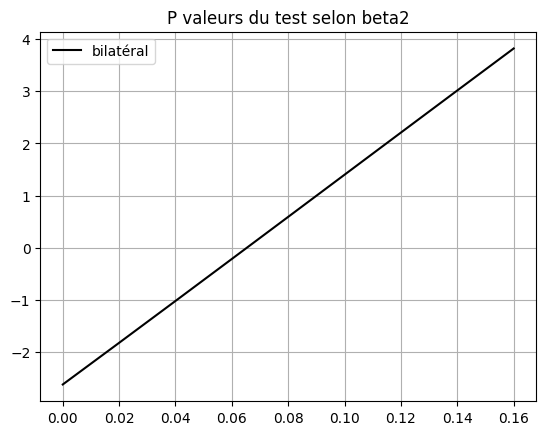

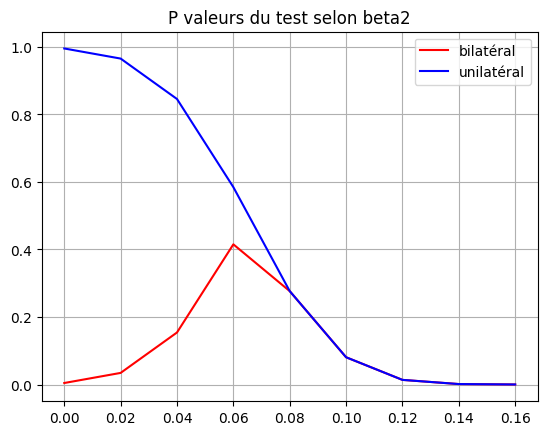

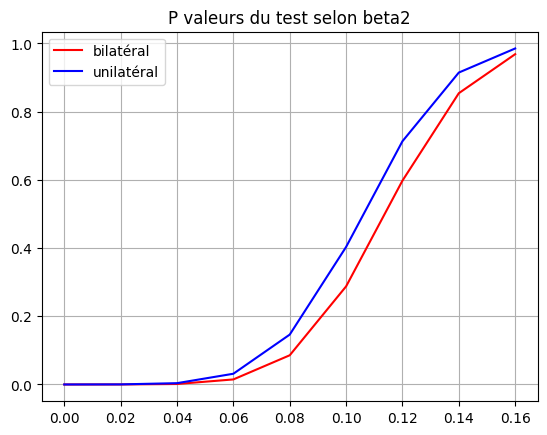

In [34]:
# Analyse des résultats du test

def plot_test_analysis():

    standard_errors, test_statistics, p_values_bil, p_values_right, power_bil, power_right = power_1()


    plt.figure()
    plt.title("Erreur standard selon beta2")
    plt.plot(beta2_values, standard_errors, label="Erreur standard", color="black")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure()
    plt.title("Statistique de test selon beta2")
    plt.plot(beta2_values, test_statistics, label="statistique de test", color="black")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure()
    plt.title("P valeurs du test selon beta2")
    plt.plot(beta2_values, p_values_bil, label="bilatéral", color="r")
    plt.plot(beta2_values, p_values_right, label="unilatéral", color="b")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure()
    plt.title("Puissance du test selon beta2")
    plt.plot(beta2_values, power_bil, label="bilatéral", color="r")
    plt.plot(beta2_values, power_right, label="unilatéral", color="b")
    plt.grid()
    plt.legend()
    plt.show()

### VI.2.B - Bootstrapped

In [35]:
# On ajoute du bootstrapping dans le test

def power_boot():

    standard_errors = []
    test_statistics = []
    p_values_bil = []
    p_values_right = []
    power_bil = []
    power_right = []
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    B = 250
    bootstrap_indices = np.random.choice(m, size=(B, m), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        moy_boot_diff = []
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train

        for bootstrap_index in bootstrap_indices:
       
           x_test = x[bootstrap_index]
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           diff = pa - pb
    
           moy_boot_diff.append(np.mean(diff))

        d_barre = np.mean(moy_boot_diff)
        se = np.std(moy_boot_diff)
 
        test_stat = d_barre/se # Statistique pour l'hypothèse nulle

        student_bil = stats.t.ppf(0.975, df=m-1)
        p_value_bil = 1 - stats.t.cdf(abs(test_stat), df = m-1)
        student_right = stats.t.ppf(0.95, df=m-1)
        p_value_right = 1 - stats.t.cdf(test_stat, df=m-1)

        test_bil = student_bil - test_stat
        test_right = student_right - test_stat
        puissance_bil = 1 - stats.norm.cdf(test_bil, 0, 1)
        puissance_right = 1 - stats.norm.cdf(test_right, 0, 1)
       
        standard_errors.append(se)
        test_statistics.append(test_stat)
        p_values_bil.append(p_value_bil)
        p_values_right.append(p_value_right)
        power_bil.append(puissance_bil)
        power_right.append(puissance_right)
        
    return  standard_errors, test_statistics, p_values_bil, p_values_right, power_bil, power_right

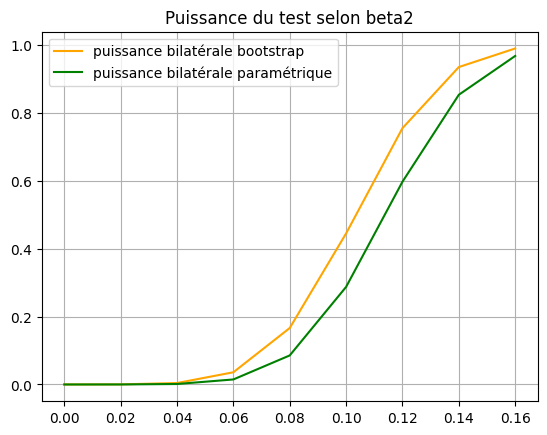

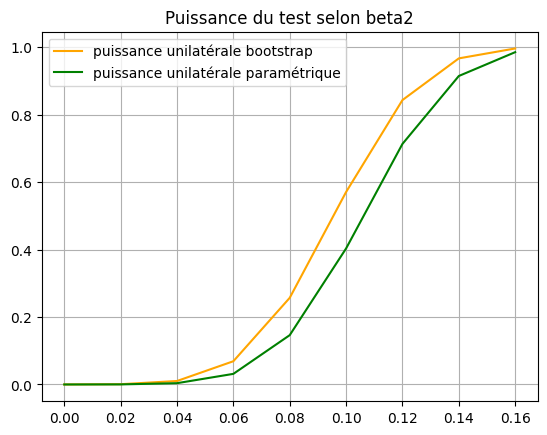

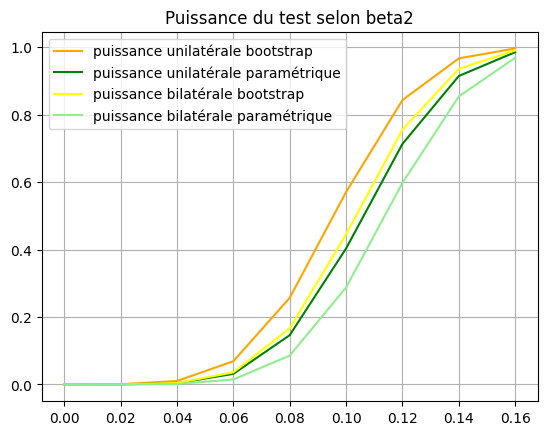

In [41]:
# Comparaison entre les deux tests

def plot_power_boot():
   

    standard_errors_boot, test_statistics_boot, p_values_bil_boot, p_values_right_boot, power_bil_boot, power_right_boot = power_boot()
    standard_errors, test_statistics, p_values_bil, p_values_right, power_bil, power_right = power_1()

    plt.figure()
    plt.title("Erreur standard du test selon beta2")
    plt.plot(beta2_values, standard_errors, label="paramétrique", color="green")
    plt.plot(beta2_values, standard_errors_boot, label="boot", color="orange")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure()
    plt.title("Statistique de test du test selon beta2")
    plt.plot(beta2_values, test_statistics, label="paramétrique", color="green")
    plt.plot(beta2_values, test_statistics_boot, label="boot", color="orange")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure()
    plt.title("Puissance du test bilatéral selon beta2")
    plt.plot(beta2_values, power_bil_boot, label="puissance bilatérale bootstrap", color="orange")
    plt.plot(beta2_values, power_bil, label="puissance bilatérale paramétrique", color="green")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure()
    plt.title("Puissance du test unilatéral selon beta2")
    plt.plot(beta2_values, power_right_boot, label="puissance unilatérale bootstrap", color="orange")
    plt.plot(beta2_values, power_right, label="puissance unilatérale paramétrique", color="green")
    plt.grid()
    plt.legend()
    plt.show()

    # Tracé de la puissance du test bilatéral et unilatéral selon beta2
    plt.figure()
    plt.title("Puissance du test selon beta2")
    plt.plot(beta2_values, power_right_boot, label="puissance unilatérale bootstrap", color="orange")
    plt.plot(beta2_values, power_right, label="puissance unilatérale paramétrique", color="green")
    plt.plot(beta2_values, power_bil_boot, label="puissance bilatérale bootstrap", color="yellow")
    plt.plot(beta2_values, power_bil, label="puissance bilatérale paramétrique", color="lightgreen")
    plt.grid()
    plt.legend()
    plt.show()


### VI.2.C - Permutation test

In [ ]:
def power_simulation_with_permutation(n_permutations=1000):

    power_perm = []
    standard_errors = []
    test_statistics = []
    permutation_p_values = []
    
    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]
    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    for beta2 in beta2_values:
        y_train = beta1 * x_train + beta2 * x_train ** 2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test ** 2 + epsilon_test

        # Linear Model
        model_a1 = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a1 = model_a1.predict(x_test.reshape(-1, 1))
        pa = (y_test - y_pred_a1) ** 2

        # Quadratic Model
        x_train_quad = np.column_stack((x_train, x_train ** 2))
        x_test_quad = np.column_stack((x_test, x_test ** 2))    
        model_a2 = LinearRegression().fit(x_train_quad, y_train)
        y_pred_a2 = model_a2.predict(x_test_quad)
        pb = (y_test - y_pred_a2) ** 2

        diff = pa - pb
        d_barre = np.mean(diff)
        se = np.std(diff) / (m ** 0.5)
        test_stat = d_barre / se

        perm_stats = []
        for _ in range(n_permutations):
            perm_indices = np.random.permutation(m)
            perm_diff = pa[perm_indices] - pb
            perm_d_barre = np.mean(perm_diff)
            perm_stats.append(perm_d_barre / se)

        perm_stats = np.array(perm_stats)

        p_value = (np.sum(perm_stats >= test_stat) + 1) / (n_permutations + 1)
        permutation_p_values.append(p_value)


        perm_student = stats.t.ppf(0.975, df=m-1)
        perm_test_alt = perm_student - perm_stats
        perm_puissance = 1 - stats.norm.cdf(perm_test_alt, 0, 1)

        power_perm.append(np.mean(perm_puissance))

        standard_errors.append(se)
        test_statistics.append(test_stat)

    return standard_errors, test_statistics, power_perm, permutation_p_values


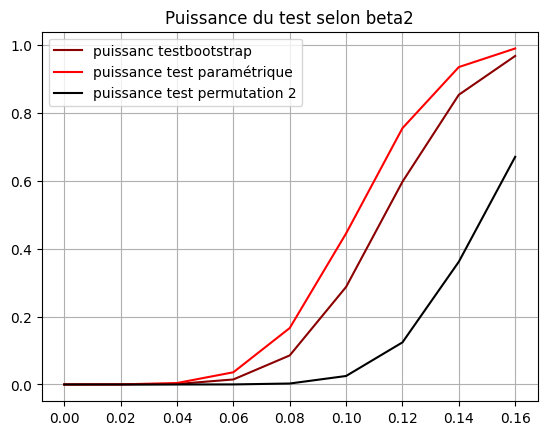

In [47]:
def plot_power_permutation():
    
    standard_errors_boot, test_statistics_boot, p_values_bil_boot, p_values_right_boot, power_bil_boot, power_right_boot = power_boot()
    standard_errors, test_statistics, p_values_bil, p_values_right, power_bil, power_right = power_1()
    standard_errors_perm, test_statistics_perm, power_perm, permutation_p_values = power_simulation_with_permutation()

    print("Standard Errors:", standard_errors_perm)
    print("Test Statistics:", test_statistics_perm)
    print("Power (Permutation):", power_perm)
    print("Permutation P-values:", permutation_p_values)

    plt.figure()
    plt.title("Puissance du test selon beta2")
    plt.plot(beta2_values, power_bil, label = "puissanc testbootstrap", color = "darkred")
    plt.plot(beta2_values, power_bil_boot, label = "puissance test paramétrique", color = "red")
    plt.plot(beta2_values, power_perm, label = "puissance test permutation 2", color = "black")
    plt.grid()
    plt.legend()
    plt.show()

### VI.2.D - Non parametric testing